In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('labelled.csv')


In [3]:
data

,Unnamed: 0,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,0,25,226802,7,1,0,0,40,1,0,...,0,1,0,0,0,0,0,0,0,1
1,5,34,198693,6,1,0,0,30,1,0,...,0,0,1,0,0,0,0,0,0,1
2,8,24,369667,10,0,0,0,40,1,0,...,0,0,1,0,0,0,0,0,0,1
3,12,26,82091,9,0,0,0,39,1,0,...,0,0,0,0,0,0,0,0,0,1
4,16,20,444554,10,1,0,0,25,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,48818,30,345898,9,1,0,0,46,1,0,...,0,0,0,0,0,0,0,0,0,1
14708,48829,65,99359,15,1,1086,0,60,1,0,...,0,0,0,0,1,0,0,0,0,1
14709,48834,32,116138,14,1,0,0,11,1,0,...,0,0,0,0,0,0,0,1,0,1
14710,48836,22,310152,10,1,0,0,40,1,0,...,0,0,0,0,0,1,0,0,0,1


# baseline decision tree

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(" Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)


 Within cluster Test Accuracy: 0.946313285762827
Confusion Matrix:
[[  55   70]
 [  88 2730]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.38      0.44      0.41       125
        >50K       0.97      0.97      0.97      2818

    accuracy                           0.95      2943
   macro avg       0.68      0.70      0.69      2943
weighted avg       0.95      0.95      0.95      2943



In [5]:
unlabel_test = pd.read_csv('unlabelled_test.csv')

X = unlabel_test.drop(columns=['income'])
y = unlabel_test['income']

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Unlabelled data Test Accuracy:", accuracy)



Unlabelled data Test Accuracy: 0.699


/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Within cluster Test Accuracy: 0.946313285762827
Confusion Matrix:
[[  55   70]
 [  88 2730]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.38      0.44      0.41       125
        >50K       0.97      0.97      0.97      2818

    accuracy                           0.95      2943
   macro avg       0.68      0.70      0.69      2943
weighted avg       0.95      0.95      0.95      2943



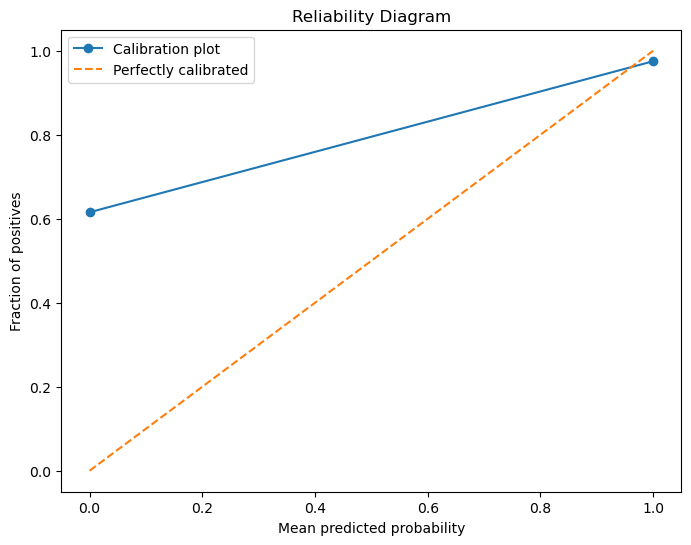

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram')
plt.legend()
plt.show()


# baseline random forest

Within cluster Test Accuracy: 0.9724770642201835
Confusion Matrix:
[[  48   77]
 [   4 2814]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.92      0.38      0.54       125
        >50K       0.97      1.00      0.99      2818

    accuracy                           0.97      2943
   macro avg       0.95      0.69      0.76      2943
weighted avg       0.97      0.97      0.97      2943



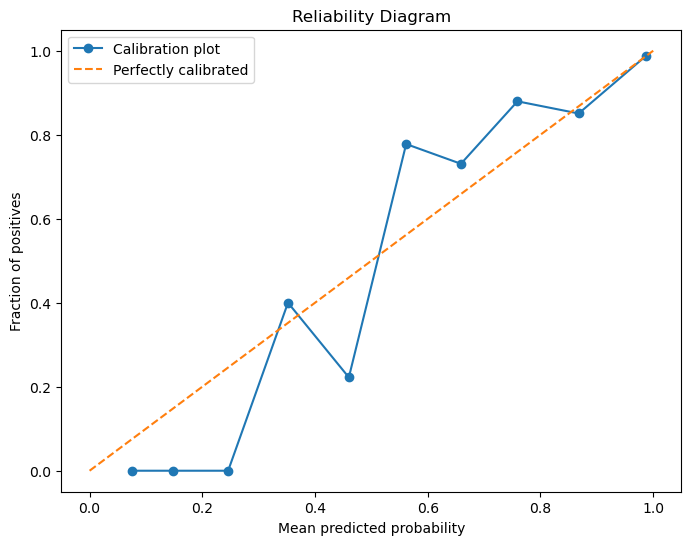

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram')
plt.legend()
plt.show()

In [7]:
unlabel_test = pd.read_csv('unlabelled_test.csv')

X = unlabel_test.drop(columns=['income'])
y = unlabel_test['income']

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Unlabelled data Test Accuracy:", accuracy)



Unlabelled data Test Accuracy: 0.702


/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# baseline logistic regression

Within cluster Test Accuracy: 0.9660210669384981
Confusion Matrix:
[[  38   87]
 [  13 2805]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.75      0.30      0.43       125
        >50K       0.97      1.00      0.98      2818

    accuracy                           0.97      2943
   macro avg       0.86      0.65      0.71      2943
weighted avg       0.96      0.97      0.96      2943



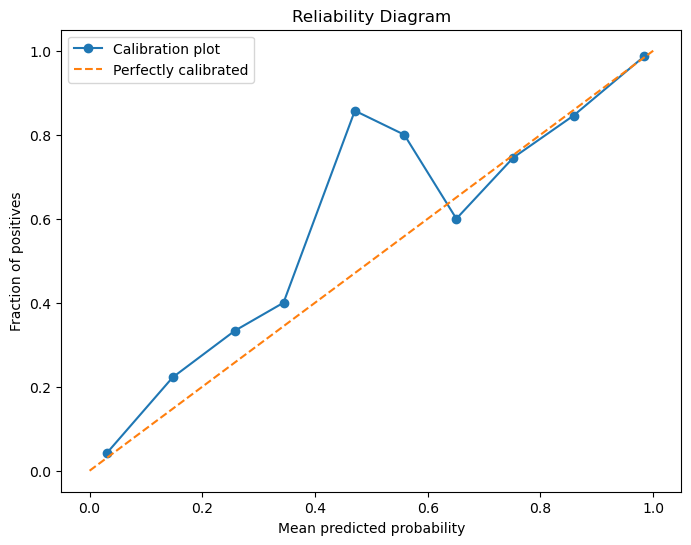

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram')
plt.legend()
plt.show()

In [9]:
unlabel_test = pd.read_csv('unlabelled_test.csv')

X = unlabel_test.drop(columns=['income'])
y = unlabel_test['income']

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Unlabelled data Test Accuracy:", accuracy)


Unlabelled data Test Accuracy: 0.348


/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)


2023-08-09 16:23:10.814550: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 16:23:10.842724: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-09 16:23:10.843157: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 16:23:12.046954: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50
166/166 [==============================] - 1s 2ms/step - loss: 0.1885 - accuracy: 0.9391 - val_loss: 0.1325 - val_accuracy: 0.9567
Epoch 2/50
166/166 [==============================] - 0s 976us/step - loss: 0.1177 - accuracy: 0.9601 - val_loss: 0.1245 - val_accuracy: 0.9584
Epoch 3/50
166/166 [==============================] - 0s 975us/step - loss: 0.1108 - accuracy: 0.9610 - val_loss: 0.1228 - val_accuracy: 0.9592
Epoch 4/50
166/166 [==============================] - 0s 982us/step - loss: 0.1067 - accuracy: 0.9630 - val_loss: 0.1278 - val_accuracy: 0.9584
Epoch 5/50
166/166 [==============================] - 0s 980us/step - loss: 0.1040 - accuracy: 0.9631 - val_loss: 0.1203 - val_accuracy: 0.9592
Epoch 6/50
166/166 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9639 - val_loss: 0.1257 - val_accuracy: 0.9601
Epoch 7/50
166/166 [==============================] - 0s 996us/step - loss: 0.1008 - accuracy: 0.9646 - val_loss: 0.1270 - val_accuracy: 0.9

In [11]:
unlabel_test = pd.read_csv('unlabelled_test.csv')

X = unlabel_test.drop(columns=['income'])
y = unlabel_test['income']

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Unlabelled data Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)


32/32 [==============================] - 0s 617us/step
Unlabelled data Test Accuracy: 0.661
Confusion Matrix:
[[  9 339]
 [  0 652]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       1.00      0.03      0.05       348
        >50K       0.66      1.00      0.79       652

    accuracy                           0.66      1000
   macro avg       0.83      0.51      0.42      1000
weighted avg       0.78      0.66      0.54      1000

